#Regressão Logística
---
**Aula Prática 04**: Regressão Logística


**Objetivo**: Treinar modelo de classificação


Banco de dados:


**Breast cancer wisconsin dataset**


Disponível via sklearn


> Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.  They describe characteristics of the cell nuclei present in the image.
>
> 1) ID number
>
> 2) Diagnosis (0 = malignant, 1 = benign)
>
> 3-32)
>
> Ten real-valued features are computed for each cell nucleus:
>
> a) radius (mean of distances from center to points on the perimeter)
>
> b) texture (standard deviation of gray-scale values)
>
> c) perimeter
>
> d) area
>
> e) smoothness (local variation in radius lengths)
>
> f) compactness (perimeter^2 / area - 1.0)
>
> g) concavity (severity of concave portions of the contour)
>
> h) concave points (number of concave portions of the contour)
>
> i) symmetry
>
> j) fractal dimension ("coastline approximation" - 1)

##Import das principais funções e leitura dos dados


---



In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets

In [2]:
data = datasets.load_breast_cancer()

In [11]:
df = pd.DataFrame(data.data, columns=data.feature_names)

In [13]:
target = pd.DataFrame(data.target, columns=['Target'])
df = pd.concat([df, target], axis=1)

In [14]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [15]:
df.shape

(569, 31)

In [16]:
df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


##Treino de modelo de regressão Logística
---


Para treinar um modelo de regressão utilizaremos o pacote sklearn.


### Separação do banco entre treino e teste
O primeiro passo para se treinar um modelo é separar o banco entre treino e teste. Para isso utilizaremos a função train_test_split


``` python
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=15)
```
No exemplo acima X é um dataframe contendo as features do modelo e Y um dataframe com a variável target.


O parâmetro test_size controla o percentual de dados que será utilizado para teste.


O parâmetro random_state controla a aleatoriedade da geração do dado, permitindo que ao reexecutar o código seja gerado os mesmos bancos de treino e teste.


É importante separar o banco entre treino e teste, pois utilizaremos o banco de treino para treinar modelos e o banco de teste para avaliar os modelos.


### Treino do modelo
Agora que já possuímos os dados de treino e teste vamos treinar o nosso modelo de regressão para isso utilizaremos o módulo LogisticRegression




``` python
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='none')
model.fit(X_train, Y_train)
```


No código acima o objeto model é do tipo LogisticRegression, nele iremos fazer o ajuste do nosso modelo, realizar predições e também ficará armazenado nele os coeficientes do modelo.


``` python
# Para acessar os coeficientes
model.coef_
# Para acessar o intercepto
model.intercept_
# Para fazer predições de classes
model.predict(X_test)
# Para fazer predições de probabilidade
model.predict_proba(X_test)
```


### Avaliação do modelo
Para avaliar o modelo treinado utilizaremos as métricas vistas na aula teórica.




``` python
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, RocCurveDisplay


# Métricas acurácia, precisão, recall, f1-score
print(classification_report(Y_test, Y_predit))


# Matriz de confusão
confusion_matrix(Y_test, Y_predit)


# AUC
roc_auc = roc_auc_score(Y_test, Y_predict)
fpr, tpr, thresholds = roc_curve(Y_test, Y_predict)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
```


Também é possível se obter cada uma das métricas do report
``` python
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score


recall_score(Y_test, Y_predict, pos_label=1)
```


### Primeiro modelo




---




Exercício:


* Separe o banco entre treino e teste. Use 30% do banco para teste. Faça a quebra com todas as variáveis.


* Treine um modelo.
* Qual a interpretação do coeficiente para mean radius?
* Qual a interpretação do coeficiente para mean concavity?
* Faça as análises de apuração do modelo


Dica:


Para se obter um dataframe com os coeficientes e seus respectivos nomes faça:


``` python
pd.DataFrame(model.coef_.T, index=X_train.columns)
```

In [20]:
X = pd.DataFrame(data.data, columns=data.feature_names)
Y = data.target

#### Solução

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=15)

In [42]:
Y_train.mean()

0.6256281407035176

In [43]:
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
457,13.21,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,0.05584,...,14.35,34.23,91.29,632.9,0.1289,0.1063,0.13900,0.06005,0.2444,0.06788
349,11.95,14.96,77.23,426.7,0.11580,0.12060,0.01171,0.01787,0.2459,0.06581,...,12.81,17.72,83.09,496.2,0.1293,0.1885,0.03122,0.04766,0.3124,0.07590
521,24.63,21.60,165.50,1841.0,0.10300,0.21060,0.23100,0.14710,0.1991,0.06739,...,29.92,26.93,205.70,2642.0,0.1342,0.4188,0.46580,0.24750,0.3157,0.09671
365,20.44,21.78,133.80,1293.0,0.09150,0.11310,0.09799,0.07785,0.1618,0.05557,...,24.31,26.37,161.20,1780.0,0.1327,0.2376,0.27020,0.17650,0.2609,0.06735
374,13.69,16.07,87.84,579.1,0.08302,0.06374,0.02556,0.02031,0.1872,0.05669,...,14.84,20.21,99.16,670.6,0.1105,0.2096,0.13460,0.06987,0.3323,0.07701


In [25]:
X_train.shape

(398, 30)

In [44]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='none')
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(penalty='none')

In [45]:
pd.DataFrame(model.coef_.T, index=X_train.columns)

,0
mean radius,1.326715
mean texture,-0.216980
mean perimeter,0.586056
mean area,-0.032345
mean smoothness,-0.044739
mean compactness,-0.228801
mean concavity,-0.326026
mean concave points,-0.135737
mean symmetry,-0.070244
mean fractal dimension,-0.014682


In [28]:
model.intercept_

array([0.23694862])

In [29]:
1/(1+np.exp(-model.intercept_))

array([0.55896155])

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, RocCurveDisplay

In [46]:
pred_class = model.predict(X_test)

In [47]:
pred_class

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0])

In [50]:
sum(Y_test)

108

In [52]:
len(Y_test)

171

In [32]:
print(classification_report(Y_test, pred_class))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        63
           1       0.94      0.92      0.93       108

    accuracy                           0.91       171
   macro avg       0.90      0.91      0.91       171
weighted avg       0.91      0.91      0.91       171



In [55]:
(0.86+0.94)/2 macro

0.8999999999999999

In [56]:
(0.86*63 + 0.94*108)/(63+108) weighted

0.9105263157894736

In [54]:
(57+99)/(63+108)  acuracia

0.9122807017543859

In [57]:
57/(57+9) precisao para o 0

0.8636363636363636

In [58]:
99/(99+6) precisao para o 1

0.9428571428571428

In [59]:
57/(57+6) recall para o 0

0.9047619047619048

In [60]:
99/(99+9) recall para o 1

0.9166666666666666

In [53]:
confusion_matrix(Y_test, pred_class)

array([[57,  6],
       [ 9, 99]])

In [36]:
from sklearn.metrics import recall_score

In [61]:
recall_score(Y_test, pred_class)

0.9166666666666666

In [62]:
recall_score(Y_test, pred_class, pos_label=0)

0.9047619047619048

In [63]:
roc_auc = roc_auc_score(Y_test, pred_class)
roc_auc

0.9107142857142856

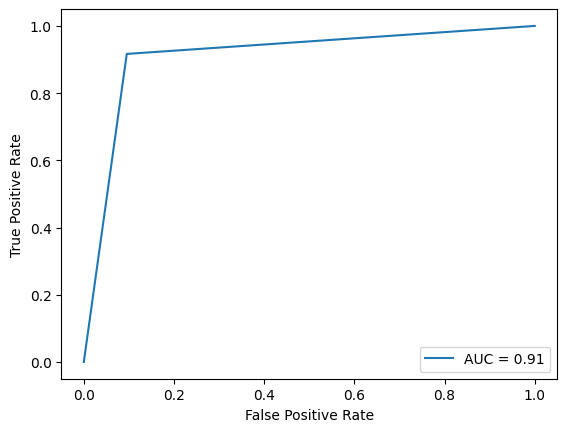

In [64]:
fpr, tpr, thresholds = roc_curve(Y_test, pred_class)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()

Exercício:

* Busca o limiar em que se obtém a melhor acurácia.

Dica:
Para realizar a busca faça:
1. Gere o score de probabilidade
2. Percorra uma lista de valores de limiar e a cada valor calcule a acurácia
3. Obtenha o limiar com maior acurácia


Para acessar P(Y=1) faça predict_proba()[:, 1]

In [72]:
np.arange(0, 1, .1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

#### Solução

In [73]:
predict_proba = model.predict_proba(X_test)

In [75]:
predict_proba[:, 1]

array([9.96407387e-01, 9.99582090e-01, 3.83688723e-05, 9.82776817e-01,
       9.96864476e-01, 4.39418609e-05, 9.67877835e-01, 9.88047767e-01,
       8.73372604e-01, 9.99313736e-01, 2.08651554e-11, 1.00132684e-04,
       9.99803464e-01, 9.99875882e-01, 9.99104437e-01, 9.86704225e-01,
       9.18440372e-01, 4.27523245e-01, 9.98885183e-01, 9.98523860e-01,
       9.96245797e-01, 9.45712808e-01, 9.98832805e-01, 9.77232371e-01,
       9.97098790e-01, 3.11816272e-03, 7.80819237e-01, 1.81271512e-01,
       9.99919032e-01, 1.09590870e-32, 9.99808587e-01, 3.35115568e-01,
       9.83389632e-01, 9.15984327e-01, 9.99475332e-01, 8.72039906e-01,
       9.93450559e-01, 4.43531253e-01, 9.99953017e-01, 9.98850201e-01,
       2.25502231e-02, 3.97357120e-01, 2.81561489e-03, 3.33034878e-02,
       1.35863676e-12, 6.95994152e-01, 9.56889825e-01, 9.97942218e-01,
       9.65079503e-01, 8.91837990e-05, 3.55449304e-15, 9.95875593e-01,
       9.99928786e-01, 9.93933270e-01, 9.98877809e-01, 9.96433712e-01,
      

In [76]:
predict_proba[:, 1] >= .5

array([ True,  True, False,  True,  True, False,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True, False,  True, False,  True,  True,  True,  True,
        True, False,  True,  True, False, False, False, False, False,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True, False, False,  True,  True, False, False,
       False, False,  True, False, False,  True, False, False,  True,
        True,  True,  True,  True, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True, False,  True, False,  True, False,  True,
        True, False,  True,  True,  True,  True, False, False,  True,
        True, False, False, False, False,  True, False,  True, False,
        True,  True, False, False, False,  True,  True,  True, False,
        True,  True,

In [77]:
from sklearn.metrics import accuracy_score


predict_proba = model.predict_proba(X_test)[:, 1]
acc_atual = 0
thr_otimo = 0
for thr in np.arange(0, 1, .1):
  acc = accuracy_score(Y_test, predict_proba>=thr)
  if acc >= acc_atual:
    thr_otimo = thr
    acc_atual = acc

In [78]:
acc_atual

0.9415204678362573

In [79]:
thr_otimo

0.7000000000000001

In [95]:
np.round(predict_proba[100:110],3)

array([0.094, 0.502, 0.999, 0.948, 0.978, 0.   , 0.406, 0.653, 1.   ,
       0.   ])

In [98]:
pred_class[100:110]

array([0, 1, 1, 1, 1, 0, 0, 1, 1, 0])

In [96]:
predict_proba[100:110] >= .5

array([False,  True,  True,  True,  True, False, False,  True,  True,
       False])

In [99]:
predict_proba[100:110] >= .7

array([False, False,  True,  True,  True, False, False, False,  True,
       False])

In [110]:
np.round(predict_proba, 3)

array([0.996, 1.   , 0.   , 0.983, 0.997, 0.   , 0.968, 0.988, 0.873,
       0.999, 0.   , 0.   , 1.   , 1.   , 0.999, 0.987, 0.918, 0.428,
       0.999, 0.999, 0.996, 0.946, 0.999, 0.977, 0.997, 0.003, 0.781,
       0.181, 1.   , 0.   , 1.   , 0.335, 0.983, 0.916, 0.999, 0.872,
       0.993, 0.444, 1.   , 0.999, 0.023, 0.397, 0.003, 0.033, 0.   ,
       0.696, 0.957, 0.998, 0.965, 0.   , 0.   , 0.996, 1.   , 0.994,
       0.999, 0.996, 0.999, 0.432, 0.173, 0.998, 0.841, 0.   , 0.008,
       0.481, 0.   , 0.993, 0.   , 0.   , 1.   , 0.   , 0.007, 1.   ,
       0.996, 0.998, 0.999, 0.991, 0.067, 0.   , 0.311, 1.   , 0.988,
       0.987, 0.999, 0.956, 0.998, 0.93 , 1.   , 1.   , 0.997, 0.   ,
       0.999, 0.509, 0.998, 0.   , 0.962, 0.   , 1.   , 0.252, 0.988,
       0.964, 0.094, 0.502, 0.999, 0.948, 0.978, 0.   , 0.406, 0.653,
       1.   , 0.   , 0.003, 0.   , 0.001, 1.   , 0.   , 0.985, 0.   ,
       1.   , 0.999, 0.004, 0.   , 0.   , 0.999, 1.   , 0.994, 0.   ,
       0.998, 1.   ,

In [113]:
import plotly.express as px

acc_lista = []
for thr in np.arange(0, 1, .01):
  acc_lista.append(accuracy_score(Y_test, predict_proba>=thr))

px.line(x=np.arange(0, 1, .01), y=acc_lista)

In [103]:
confusion_matrix(Y_test, pred_class)

array([[57,  6],
       [ 9, 99]])

In [101]:
confusion_matrix(Y_test, predict_proba>=.7)

array([[62,  1],
       [ 9, 99]])

Exercício:


* Construa um gráfico que analise os valores de precisão, recall e f1 score para cada limiar.


Dica:
Para realizar a busca faça:
1. Gere o score de probabilidade
2. Percorra uma lista de valores de limiar e a cada valor calcule as métricas e salve em uma lista


Construa um dataframe através dessa lista
Utilize a função de line do plotly.express para gerar o gráfico.


``` python
import plotly.express as px
px.line(df, x='limiar', y=['precisao', 'recall', 'f1'])
```

#### Solução

In [105]:
from sklearn.metrics import f1_score, precision_score, recall_score


predict_proba = model.predict_proba(X_test)[:, 1]
row = []
for thr in np.arange(0, 1, .1):
  pre = precision_score(Y_test, predict_proba>thr)
  rec = recall_score(Y_test, predict_proba>thr)
  f1 = f1_score(Y_test, predict_proba>thr)

  row.append((thr, pre, rec, f1))

df = pd.DataFrame(row, columns=['thr', 'pre', 'rec', 'f1'])
px.line(df, x='thr', y=['pre', 'rec'])

In [106]:
from sklearn.metrics import f1_score, precision_score, recall_score


predict_proba = model.predict_proba(X_test)[:, 1]
row = []
for thr in np.arange(0, 1, .1):
  pre = precision_score(Y_test, predict_proba>thr, pos_label=0)
  rec = recall_score(Y_test, predict_proba>thr, pos_label=0)
  f1 = f1_score(Y_test, predict_proba>thr, pos_label=0)

  row.append((thr, pre, rec, f1))

df = pd.DataFrame(row, columns=['thr', 'pre', 'rec', 'f1'])
px.line(df, x='thr', y=['pre', 'rec', 'f1'])

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

